<h1><center>Markov Chains Project</center></h1>
<h2><center>Team JLRCactus</center></h2>

## Imports ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

## Main ##

### Variables ###

In [61]:
# Values of dimensions n and m
n = 1000
m = 2000
# Initial random vector
x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1

# To be found vector
X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 

# Known matrix W
W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

beta0=0.2


### Run ###

## Tools ##

In [3]:
def ReLU(x) :
    return x * (x > 0)

In [4]:
def compute_Y(W, X) :
    n = W.shape[1]
    return ReLU((W @ X)/np.sqrt(n))

In [5]:
def compute_H(W, x, Y) :
    diff = Y - compute_Y(W, x)
    return diff.T.dot(diff)

In [6]:
def random_flip(x) :
    i = np.random.randint(low=0, high=len(x))
    new_x = x.copy()
    new_x[i] = -new_x[i]
    return new_x

In [7]:
def accept(W, x0, x1, beta, Y) :
    return min(1, np.exp(-beta*( compute_H(W, x1, Y) - compute_H(W, x0, Y) )))

In [8]:
def rec_error(x0, X, n):
    n = len(X)
    return (x0-X).T.dot(x0-X) / (4*n)

## Metropolis Algorithm ##

In [69]:
def metropolis(W, X, x0, threshold, beta0) :
    
    e = sys.maxsize
    beta = beta0
    Y_true = compute_Y(W, X)
    n = len(X)
    errors = []
    energies = []
    betas = []
    i = 0
    nbre_iter= 5000
    from_last_beta = 0
    beta_augm =0.2
    treshold = nbre_iter/40
    while e > threshold and i < nbre_iter: 
        i +=1
        from_last_beta += 1
        
        x1 = random_flip(x0)
        a = accept(W, x0, x1, beta, Y_true)
        
        if a >= np.random.uniform() : # Swap with prob metropolis
            x0 = x1
        
        if (from_last_beta> treshold and np.std(energies[-200:]) < 1 ):#m/285.7):
            print(i, end=', ')
            beta += beta_augm
            from_last_beta = 0
        energies.append(compute_H(W, x0, Y_true))        
        e = rec_error(x0, X, n)
        errors.append(e)      
        betas.append(beta)
        
    return x0, errors, energies, betas

In [70]:
found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

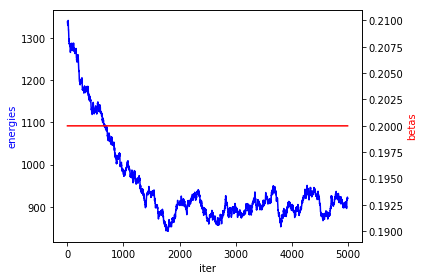

In [71]:
fig, ax1 = plt.subplots()

s1 = energies
ax1.plot(s1, 'b')
ax1.set_xlabel('iter')

ax1.set_ylabel('energies', color='b')

ax2 = ax1.twinx()
s2 = betas
ax2.plot(s2, 'r')
ax2.set_ylabel('betas', color='r')

fig.tight_layout()
plt.show()

In [72]:
betas[-1]

0.2

In [73]:
min(errors)

0.376

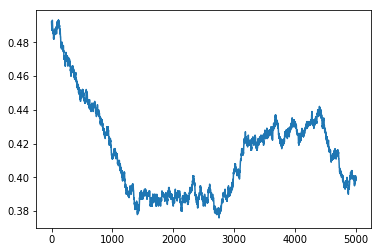

In [74]:
plt.plot(errors)
plt.show()

In [68]:
(found_X != X).sum()

140

## Find expected value and std dev ##

In [36]:
def exp_std_error(number_experiments=10):
    
    mean_list = []
    std_list = []
    
    for m in range(1000, 11000, 1000):
    
        error_m = []

        for j in range(0,number_experiments):

            #  drawing W and X
            x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1
            X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 
            W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

            print()
            print("---- New experiment with alpha= {} ----".format(m/n))
            found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

            error_m.append(min(errors))

        mean = np.mean(error_m)
        std_dev = np.std(error_m)
        
        mean_list.append(mean)
        std_list.append(std_dev)
    
    return mean_list, std_list

In [37]:
mean_list, std_list = exp_std_error()
mean_list, std_list


---- New experiment with alpha= 1.0 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha= 1.0 ----
126, 379, 505, 631, 757, 883, 1009, 1135, 1261, 1387, 1513, 1639, 1765, 1891, 2017, 2143, 2269, 2395, 2521, 2647, 2773, 2899, 3025, 3151, 3277, 3403, 3529, 3655, 3781, 3907, 4033, 4159, 4285, 4411, 4537, 4663, 4789, 4915, 
---- New experiment with alpha= 1.0 ----
126, 252, 436, 562, 688, 814, 940, 1066, 1192, 1318, 1444, 1570, 1696, 1822, 1948, 2074, 2200, 2326, 2452, 2578, 2704, 2830, 2956, 3082, 3208, 3334, 3460, 3586, 3712, 3838, 3964, 4090, 4216, 4342, 4468, 4594, 4720, 4846, 4972, 
---- New experiment with alpha= 1.0 ----
126, 389, 541, 667, 793, 919, 1045, 1171, 1297, 1423, 1549, 1675, 1801, 1927, 2053, 2179, 2305, 2431, 2557, 2683, 2809, 2935, 3061, 3187, 3313, 3439, 3565, 

527, 1670, 1796, 2110, 2236, 2580, 2706, 3013, 3139, 3265, 3391, 3517, 3643, 3769, 3895, 4021, 4147, 4273, 4399, 4525, 4651, 4777, 4903, 
---- New experiment with alpha= 4.0 ----
631, 1859, 2072, 2198, 2324, 2450, 2576, 2704, 2830, 2956, 3082, 3208, 3334, 3460, 3586, 3712, 3838, 3977, 4103, 4229, 4355, 4481, 4607, 4733, 4859, 4985, 
---- New experiment with alpha= 4.0 ----
616, 1293, 1561, 2125, 2251, 2377, 2503, 2629, 2755, 2881, 3007, 3133, 3259, 3385, 3511, 3637, 3763, 3889, 4015, 4141, 4267, 4393, 4519, 4645, 4771, 4897, 
---- New experiment with alpha= 4.0 ----
409, 1577, 1806, 2087, 2213, 2406, 2532, 2658, 2784, 2910, 3036, 3162, 3446, 3572, 3698, 3824, 3950, 4076, 4202, 4328, 4454, 4580, 4706, 4832, 4958, 
---- New experiment with alpha= 4.0 ----
861, 1402, 1528, 2082, 2354, 2480, 2606, 2732, 2913, 3039, 3165, 3291, 3417, 3543, 3669, 3795, 3921, 4047, 4173, 4299, 4425, 4551, 4677, 4803, 4929, 
---- New experiment with alpha= 4.0 ----
1132, 1258, 1985, 2392, 2712, 2838, 2964, 309

KeyboardInterrupt: 

NameError: name 'mean_list' is not defined

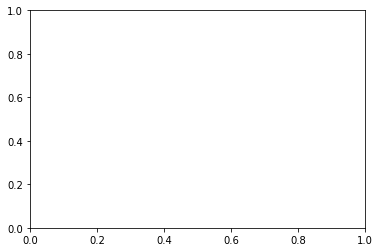

In [38]:
fig, ax1 = plt.subplots()

s1 = mean_list
ax1.plot(s1, 'b')
ax1.set_xlabel('alpha')
ax1.set_ylabel('mean', color='b')

ax2 = ax1.twinx()
s2 = std_list
ax2.plot(s2, 'r')
ax2.set_ylabel('standard deviation', color='r.')

fig.tight_layout()
plt.show()